<a href="https://colab.research.google.com/github/hwuiwon/ML_study/blob/master/Using_scikit_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Scikit-learn**

## **Summary**

We call performance on out-of-sample data of the models learned by the algorithm as **Generalization Performance**.

In order to check model's performance by the **"right"** way, we split the train data set into two and use one of them in training and use the other part to test the model.

### **Rules**

> When spliting the training data set into two, there should be more train set than test set.

> Training data should be mixed evenly between both sets.

## **Wisconsin breast cancer dataset**

We will use **Wisconsin breast cancer dataset** from scikit-learn.

In [0]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

We will check cancer's data and target.

In [0]:
print(cancer.data.shape, cancer.target.shape)

(569, 30) (569,)


It seems there are **569** data and **30** cancer characteristics.

In [0]:
cancer.data[:3]

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
        8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
        3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
        1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
        1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, 1.203e+03, 1.096e-01, 1.599e-01,
        1.974e-01, 1.279e-01, 2.069e-01, 5.999e-02, 7.456e-01, 7.869e-01,
        4.585e+00, 9.403e+01, 6.150e-03, 4.006e-02, 3.832e-02, 2.058e-02,
        2.250e-02, 4.571e-03, 2.357e

As there are too many characteristics, we will use the box plot to show each characteristic's **quartile value** instead of using scatter plot.
<br><br>
First import **matplotlib** and **numpy** by running the code below.

In [0]:
import matplotlib.pyplot as plt
import numpy as np

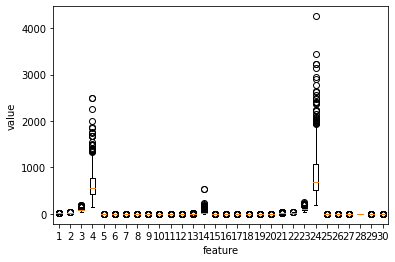

In [0]:
plt.boxplot(cancer.data)
plt.xlabel('feature')
plt.ylabel('value')
plt.show()

By looking at the box plot, we can see distribution of **4, 14, and 24th feature** is greater than others.

Let's check what those features are.

In [0]:
cancer.feature_names[[3,13,23]]

array(['mean area', 'area error', 'worst area'], dtype='<U23')

We will now check target of the cancer dataset.

In [0]:
np.unique(cancer.target, return_counts=True)

(array([0, 1]), array([212, 357]))

There are 212 benign tumors (target value = 0) and 357 malignant tumors (target value = 1).

In [0]:
x = cancer.data
y = cancer.target

As mentioned in the rule previously, we will split the data into two individual sets.

In [0]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=42)

> **stratify** parameter makes a split so that the proportion of values in the sample produced will be the same as the proportion of values provided to parameter.

> **train_test_split** method splits data set into a training data set and test data set of 75:25 ratio.<br>In this case, we use **test_size** parameter to change that ratio into 80:20.

Let's check if our data set is split.

In [0]:
print(x_train.shape, x_test.shape)
np.unique(y_train, return_counts=True)

(455, 30) (114, 30)


(array([0, 1]), array([170, 285]))

### **Embodying Logistic Regression**

![Concept](https://drive.google.com/uc?id=1yxClBI1owKWIYlicrrUg-2PGb990oDsd)

In [0]:
class LogisticNeuron:

  def __init__(self):
    self.w = None
    self.b = None
  
  def forpass(self, x):
    z = np.sum(x * self.w) + self.b
    return z

  # Calculate gradient
  def backprop(self, x, err):
    w_grad = x * err
    b_grad = 1 * err
    return w_grad, b_grad

  # Training
  def fit(self, x, y, epochs=100):
    self.w = np.ones(x.shape[1])
    self.b = 0
    for i in range(epochs):
      for x_i, y_i in zip(x, y):
        z = self.forpass(x_i)
        a = self.activation(z)
        err = -(y_i - a)
        w_grad, b_grad = self.backprop(x_i, err)
        self.w -= w_grad
        self.b -= b_grad
  
  # Sigmoid function
  def activation(self, z):
    a = 1 / (1 + np.exp(-z))
    return a

  def predict(self, x):
    z = [self.forpass(x_i) for x_i in x]
    a = self.activation(np.array(z))
    return a > 0.5

Now we will train model by using LogisticNeuron.

In [0]:
neuron = LogisticNeuron()
neuron.fit(x_train, y_train)

np.mean(neuron.predict(x_test) == y_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: overflow encountered in exp


0.8245614035087719

It seems that our model has accuracy of **82.46%**

We will now try to improve the accuracy.

### **Gradient Descent**

We used **stochastic gradient descent**, which is calculating gradient by randomly choosing one sample from the data.

However we will now use **batch gradient descent** that uses all training set to calculate gradient. 

The types of gradient descent mentioned previously should calculate $w$ by shuffling indexes randomly for each epoch.<br>That way, the search process is diversified and we can find the optimal weight $w$.

This can be done by using 

```
np.random.permutation()
```



In [0]:
class SingleLayer:

  def __init__(self):
    self.w = None
    self.b = None
    self.losses = []

  def forpass(self, x):
    z = np.sum(x * self.w) + self.b
    return z

  def backprop(self, x, err):
    w_grad = x * err
    b_grad = 1 * err
    return w_grad, b_grad

  def add_bias(self, x):
    return np.c_[np.ones((x.shape[0], 1)), x]

  def activation(self, z):
    a = 1 / (1 + np.exp(-z))
    return a
  
  def fit(self, x, y, epochs=100):
    self.w = np.ones(x.shape[1])
    self.b = 0
    for i in range(epochs):
      loss = 0
      indexes = np.random.permutation(np.arange(len(x))) # Mixing index
      for i in indexes:
        z = self.forpass(x[i])
        a = self.activation(z)
        err = -(y[i] - a)
        w_grad, b_grad = self.backprop(x[i], err)
        self.w -= w_grad
        self.b -= b_grad
        a = np.clip(a, 1e-10, 1 - 1e-10) # Clipping value for stable log calculation

        loss += -(y[i] * np.log(a) + (1 - y[i]) * np.log(1 - a))
      self.losses.append(loss/len(y))

  def predict(self, x):
    z = [self.forpass(x_i) for x_i in x]
    return np.array(z) > 0

  def score(self, x, y):
    return np.mean(self.predict(x) == y)

It's time to test our new neural network.

In [0]:
layer = SingleLayer()
layer.fit(x_train, y_train)
layer.score(x_test, y_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp


0.8859649122807017

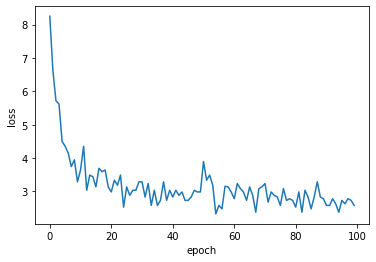

In [0]:
plt.plot(layer.losses)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

We can see that accuracy increased from **0.82** to **0.89**.<br>This is because we mixed index of training set for each epoch.

## **Using Class from scikit-learn**

**SGDClassifier** is a class that implemens gradient descent.

In [0]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

x = load_breast_cancer().data
y = load_breast_cancer().target
x_train_all, x_test, y_train_all, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=42)

In [0]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(loss='log', random_state=42)
sgd.fit(x_train_all, y_train_all)
sgd.score(x_test, y_test)

0.8333333333333334

We can select other loss function to improve accuracy of our model.

We will try using **hinge** loss function.

In [0]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(loss='hinge', random_state=42)
sgd.fit(x_train_all, y_train_all)
sgd.score(x_test, y_test)

0.9385964912280702

A Model that uses the hinge loss function to train yields better performance. We call this **"tuning"**.

However, there is a high probability that this model will **not perform well in real life**.<br>If we tune a model by using a test set, it creates a model that shows good performance on "test data" not "real data".